<a href="https://colab.research.google.com/github/Manudrel/C-lculo-de-m-tricas/blob/main/Calculo_de_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

In [3]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np
import seaborn as sns
import pandas as pd

In [4]:
tf.__version__

'2.18.0'

In [5]:
%load_ext tensorboard

In [6]:
logdir='log'

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0,1,2,3,4,5,6,7,8,9]

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9002 - loss: 0.3325 - val_accuracy: 0.9843 - val_loss: 0.0492
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9838 - loss: 0.0510 - val_accuracy: 0.9818 - val_loss: 0.0548
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9889 - loss: 0.0350 - val_accuracy: 0.9889 - val_loss: 0.0342
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9932 - loss: 0.0228 - val_accuracy: 0.9899 - val_loss: 0.0314
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9942 - loss: 0.0178 - val_accuracy: 0.9915 - val_loss: 0.0306


In [10]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [11]:
classes = [0,1,2,3,4,5,6,7,8,9]

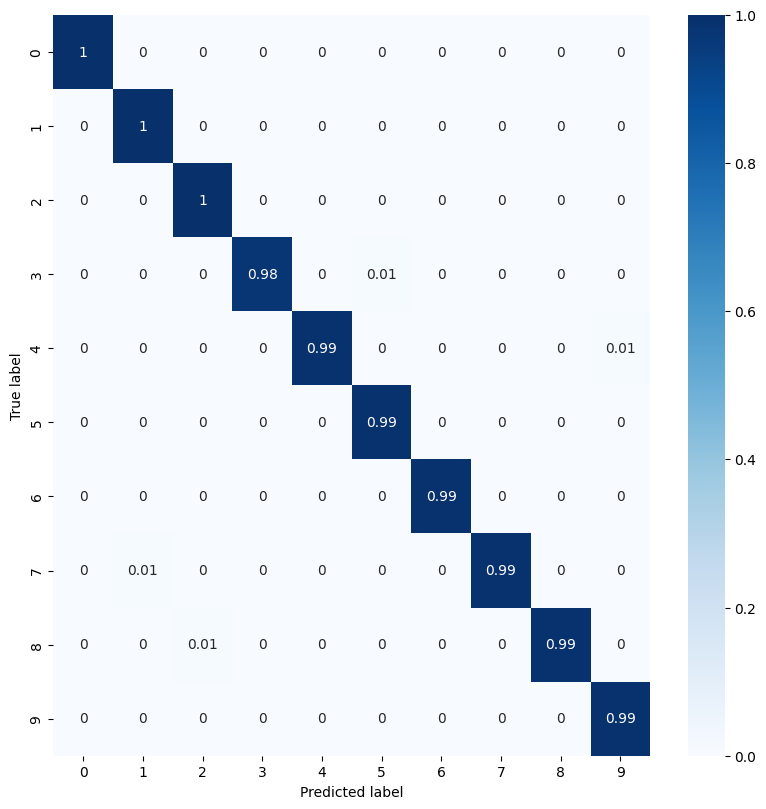

In [12]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index=classes,
                          columns=classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
i = 6

Vp = con_mat[i, i]
Fp = np.sum(con_mat[:, i]) - Vp
Fn = np.sum(con_mat[i, :]) - Vp
Vn = np.sum(con_mat) - (Vp + Fp + Fn)

N = Vp + Fp + Fn + Vn

print(f"Classe: {i}")
print(f"VP: {Vp}")
print(f"FP: {Fp}")
print(f"FN: {Fn}")
print(f"VN: {Vn}")
print(f"Total de amostras (N): {N}")


Classe: 6
VP: 950
FP: 2
FN: 8
VN: 9040
Total de amostras (N): 10000


In [29]:
recall = Vp/(Vp+Fn)
espec = Vn/(Fn+Vn)
accuracy  = (Vp+Vn)/N
precision  = Vp/(Vp+Fp)
f_score = 2*(precision *recall)/(precision +recall)


print(f"Sensibilidade: {recall*100:.2f}%")
print(f"Especificidade: {espec*100:.2f}%")
print(f"Acuracia: {accuracy*100:.2f}%")
print(f"Precisão: {precision*100:.2f}%")
print(f"f_score: {f_score*100:.2f}%")


Sensibilidade: 99.16%
Especificidade: 99.91%
Acuracia: 99.90%
Precisão: 99.79%
f_score: 99.48%
